In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statannotations.Annotator import Annotator
from itertools import combinations
from scipy.stats import mannwhitneyu
import gzip

In [2]:
# Carregar os dados de cada arquivo
mosdepth = pd.read_csv('mosdepth.tsv', sep='\t')
pandepth = pd.read_csv('pandepth.tsv', sep='\t')
samtools = pd.read_csv('samtools.tsv', sep='\t')

# Adicionar uma coluna para identificar a origem dos dados
mosdepth['Ferramenta'] = 'Mosdepth'
pandepth['Ferramenta'] = 'Pandepth'
samtools['Ferramenta'] = 'Samtools'

# Combinar os três DataFrames em um único
df = pd.concat([mosdepth, pandepth, samtools], ignore_index=True)

# Selecionar as métricas para comparação
metrics = ['Tempo(s)', 'Memória(MB)', 'CPU(%)', 'Disco(MB)']

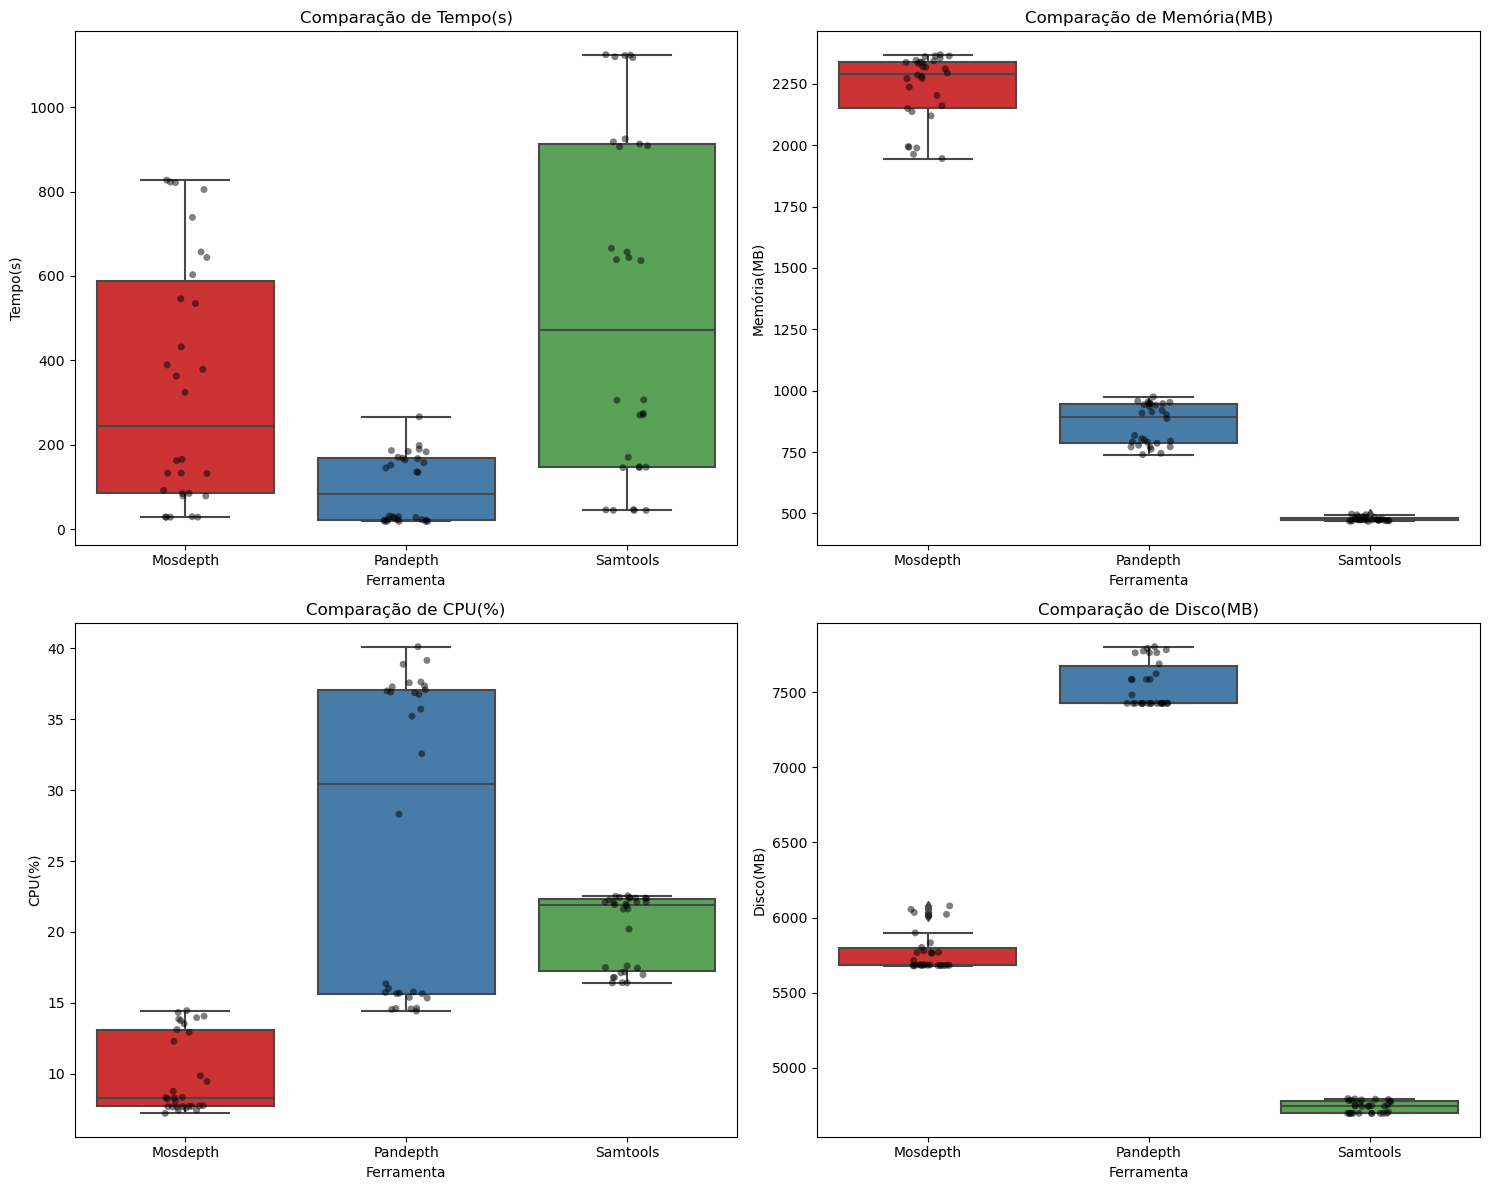

In [3]:
# Criar os boxplots para cada métrica com jitter e organizar 2 por linha
fig, axs = plt.subplots(len(metrics) // 2 + len(metrics) % 2, 2, figsize=(15, 12), sharey=False)

axs = axs.flatten()

for i, metric in enumerate(metrics):
    sns.boxplot(
        x='Ferramenta', y=metric, data=df, ax=axs[i], palette='Set1'
    )
    sns.stripplot(
        x='Ferramenta', y=metric, data=df, ax=axs[i], color='black', alpha=0.5, jitter=True
    )
    axs[i].set_title(f'Comparação de {metric}')
    axs[i].set_xlabel('Ferramenta')
    axs[i].set_ylabel(metric)

# Remover gráficos vazios, se houver
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

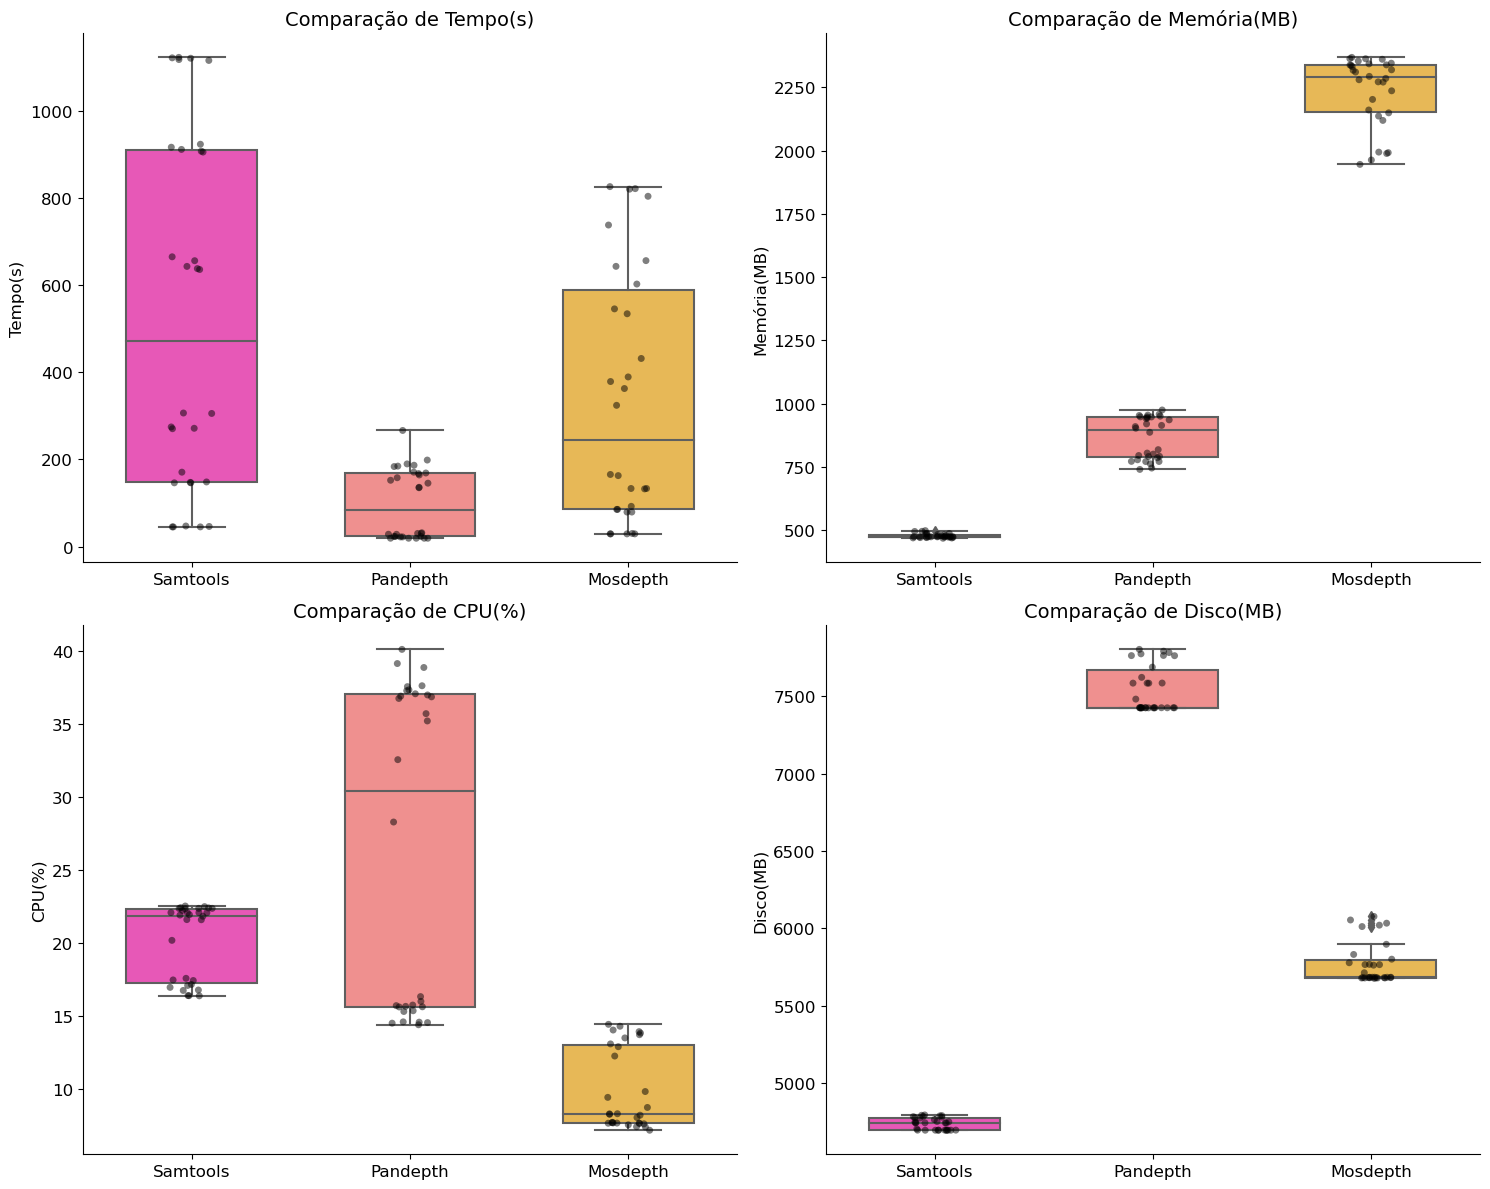

In [4]:
# Alterar a ordem das ferramentas
df['Ferramenta'] = pd.Categorical(df['Ferramenta'], categories=['Samtools', 'Pandepth', 'Mosdepth'], ordered=True)


fig, axs = plt.subplots(len(metrics) // 2 + len(metrics) % 2, 2, figsize=(15, 12), sharey=False)
axs = axs.flatten()

for i, metric in enumerate(metrics):
    sns.boxplot(
        x='Ferramenta', y=metric, data=df, ax=axs[i], palette='spring', width=0.6
    )
    sns.stripplot(
        x='Ferramenta', y=metric, data=df, ax=axs[i], color='black', alpha=0.5, jitter=True
    )
    axs[i].set_title(f'Comparação de {metric}', fontsize=14)
    axs[i].set_xlabel('')
    axs[i].set_ylabel(metric, fontsize=12)
    axs[i].tick_params(axis='both', which='major', labelsize=12)

for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

sns.despine()
plt.tight_layout()
plt.show()


In [5]:

# Comparar as ferramentas par a par para cada métrica
for metric in metrics:
    print(f"Métrica: {metric}")
    tools = df['Ferramenta'].unique()
    for tool1, tool2 in combinations(tools, 2):
        group1 = df[df['Ferramenta'] == tool1][metric]
        group2 = df[df['Ferramenta'] == tool2][metric]
        stat, p_value = mannwhitneyu(group1, group2, alternative='two-sided')
        print(f"Comparação entre {tool1} e {tool2}:")
        print(f"Estatística de Mann-Whitney U: {stat:.2f}, p-valor: {p_value:.4f}")
        if p_value < 0.05:
            print("Diferença estatisticamente significativa.\n")
        else:
            print("Nenhuma diferença estatisticamente significativa.\n")


Métrica: Tempo(s)
Comparação entre Mosdepth e Pandepth:
Estatística de Mann-Whitney U: 671.50, p-valor: 0.0011
Diferença estatisticamente significativa.

Comparação entre Mosdepth e Samtools:
Estatística de Mann-Whitney U: 315.00, p-valor: 0.0467
Diferença estatisticamente significativa.

Comparação entre Pandepth e Samtools:
Estatística de Mann-Whitney U: 130.00, p-valor: 0.0000
Diferença estatisticamente significativa.

Métrica: Memória(MB)
Comparação entre Mosdepth e Pandepth:
Estatística de Mann-Whitney U: 900.00, p-valor: 0.0000
Diferença estatisticamente significativa.

Comparação entre Mosdepth e Samtools:
Estatística de Mann-Whitney U: 900.00, p-valor: 0.0000
Diferença estatisticamente significativa.

Comparação entre Pandepth e Samtools:
Estatística de Mann-Whitney U: 900.00, p-valor: 0.0000
Diferença estatisticamente significativa.

Métrica: CPU(%)
Comparação entre Mosdepth e Pandepth:
Estatística de Mann-Whitney U: 1.00, p-valor: 0.0000
Diferença estatisticamente significati

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Samtools vs. Pandepth: Wilcoxon test (paired samples), P_val:1.863e-09 Stat=0.000e+00
Pandepth vs. Mosdepth: Wilcoxon test (paired samples), P_val:1.863e-09 Stat=0.000e+00
Samtools vs. Mosdepth: Wilcoxon test (paired samples), P_val:1.863e-09 Stat=0.000e+00
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Samtools vs. Pandepth: Wilcoxon test (paired samples), P_val:1.863e-09 Stat=0.000e+00
Pandepth vs. Mosdepth: Wilcoxon test (paired samples), P_val:1.863e-09 Stat=0.000e+00
Samtools vs. Mosdepth: Wilcoxon test (paired samples), P_val:1.863e-09 Stat=0.000e+00
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
   

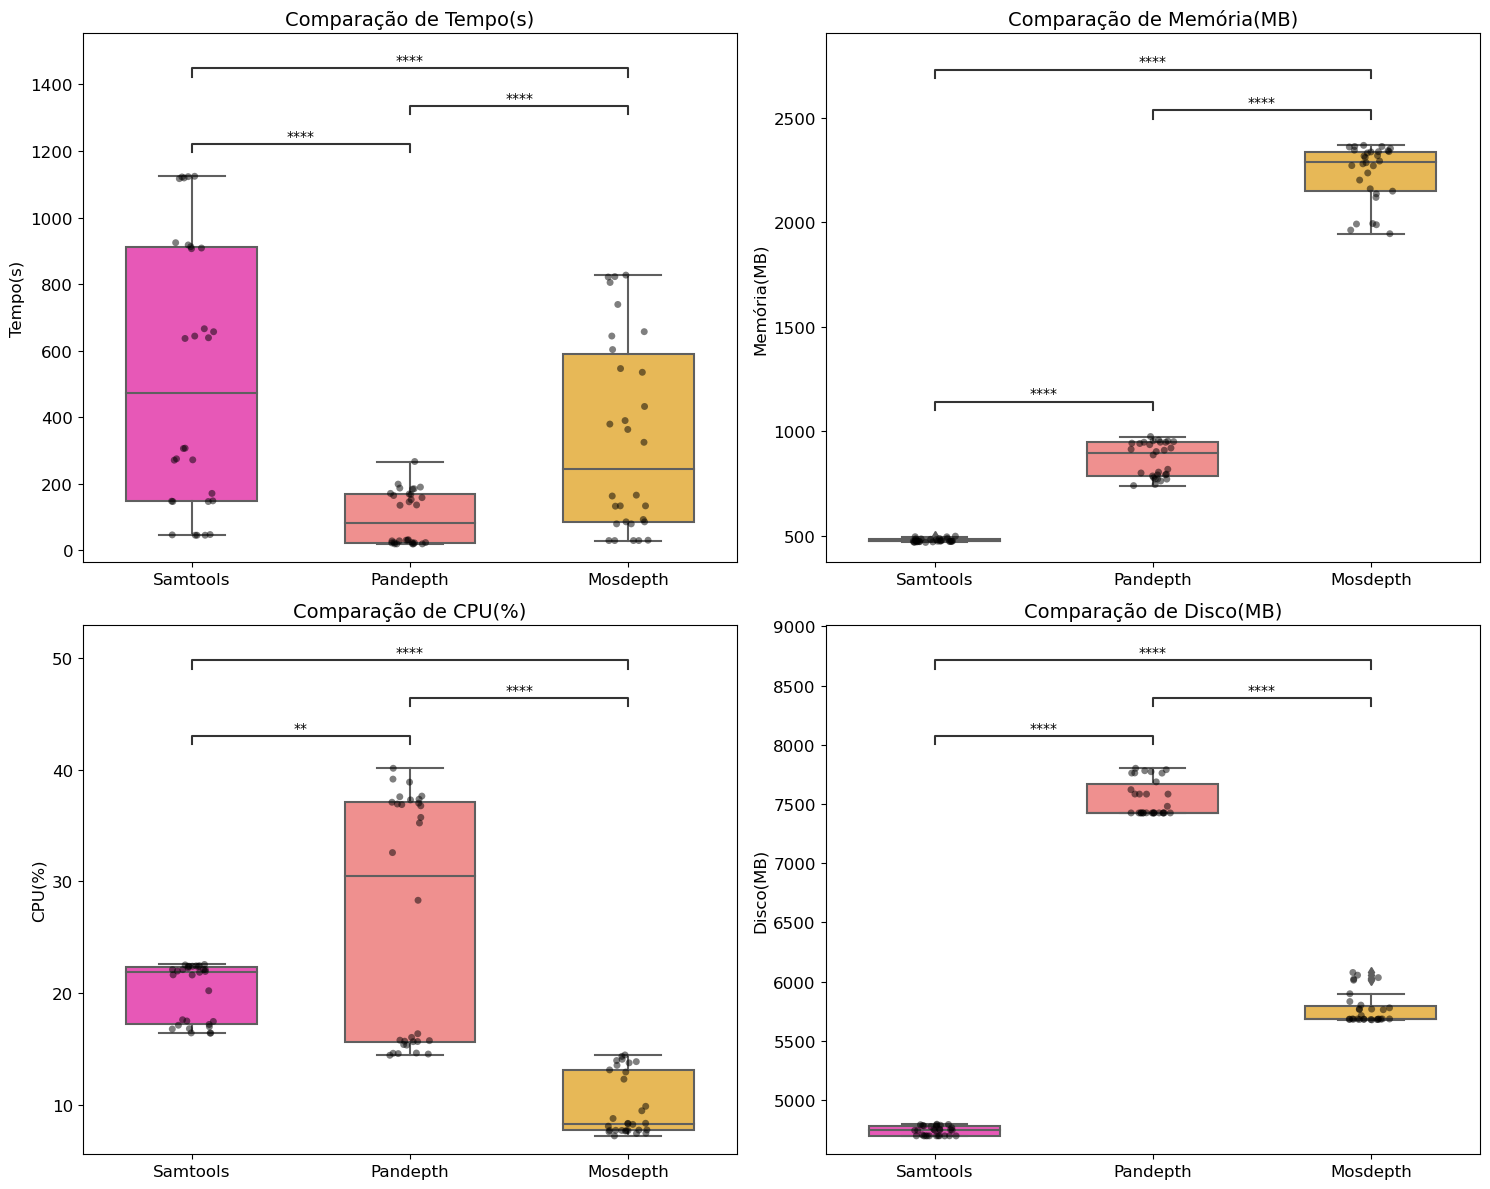

In [6]:
# Criar boxplots com anotações de significância
fig, axs = plt.subplots(len(metrics) // 2 + len(metrics) % 2, 2, figsize=(15, 12), sharey=False)
axs = axs.flatten()

for i, metric in enumerate(metrics):
    ax = axs[i]
    sns.boxplot(x='Ferramenta', y=metric, data=df, ax=ax, palette='spring', width=0.6)
    sns.stripplot(x='Ferramenta', y=metric, data=df, ax=ax, color='black', alpha=0.5, jitter=True)

    # Configurar pares para comparação
    pairs = list(combinations(df['Ferramenta'].cat.categories, 2))
    annotator = Annotator(ax, pairs, data=df, x='Ferramenta', y=metric)
    annotator.configure(test='Wilcoxon', text_format='star', loc='inside')  # Alterar loc para 'inside'
    annotator.apply_and_annotate()

    ax.set_title(f'Comparação de {metric}', fontsize=14)
    ax.set_xlabel('')
    ax.set_ylabel(metric, fontsize=12)
    ax.tick_params(axis='both', which='major', labelsize=12)

plt.tight_layout()
plt.show()



In [7]:

# Lista dos arquivos
arquivos = [
    'pandepth_sample_100.bed.stat.gz',
    'mosdepth_sample_100.mosdepth.summary.txt',
    'output_large_100_samtools.txt.gz'
]

# Detectar ferramenta baseado no conteúdo do arquivo
def detect_tool(filepath):
    open_func = gzip.open if filepath.endswith('.gz') else open
    with open_func(filepath, 'rt') as f:
        first_line = f.readline()
        if first_line.startswith('#Chr'):
            return 'pandepth'
        elif first_line.startswith('chrom') or '\tmean\t' in first_line:
            return 'mosdepth'
        elif len(first_line.strip().split('\t')) == 3:
            return 'samtools'
    return None

# Parser para Pandepth
def parse_pandepth(filepath):
    df = pd.read_csv(filepath, sep='\t', comment='#', compression='gzip' if filepath.endswith('.gz') else None)
    df_grouped = df.groupby('chr').apply(
        lambda x: (x['MeanDepth'] * x['Length']).sum() / x['Length'].sum()
    ).reset_index()
    df_grouped.columns = ['Chromosome', 'MeanCoverage']
    return df_grouped

# Parser para Mosdepth
def parse_mosdepth(filepath):
    df = pd.read_csv(filepath, sep='\t', compression='gzip' if filepath.endswith('.gz') else None)
    df = df[df['chrom'].str.match(r'^chr[0-9XY]+$')]
    df_grouped = df.groupby('chrom').apply(
        lambda x: (x['mean'] * x['length']).sum() / x['length'].sum()
    ).reset_index()
    df_grouped.columns = ['Chromosome', 'MeanCoverage']
    return df_grouped

# Parser para Samtools
def parse_samtools(filepath):
    df = pd.read_csv(filepath, sep='\t', header=None, names=['chrom', 'pos', 'depth'], compression='gzip' if filepath.endswith('.gz') else None)
    df_grouped = df.groupby('chrom')['depth'].mean().reset_index()
    df_grouped.columns = ['Chromosome', 'MeanCoverage']
    return df_grouped

# Processar todos os arquivos
def process_files(filepaths):
    results = {}
    for f in filepaths:
        tool = detect_tool(f)
        print(f'\n📁 Arquivo: {f} — Detectado como: {tool}')
        if tool == 'pandepth':
            result = parse_pandepth(f)
        elif tool == 'mosdepth':
            result = parse_mosdepth(f)
        elif tool == 'samtools':
            result = parse_samtools(f)
        else:
            print(f"❌ Não reconhecido: {f}")
            continue
        results[f] = result
    return results

# Combina os resultados
def combinar_resultados(results):
    dfs = []
    for nome_arquivo, df in results.items():
        nome_ferramenta = detect_tool(nome_arquivo)
        df['Ferramenta'] = nome_ferramenta
        dfs.append(df)
    return pd.concat(dfs)

# Executa o processamento e plota os resultados
results = process_files(arquivos)
df_completo = combinar_resultados(results)

# Normaliza nomes dos cromossomos para facilitar comparação
df_completo['Chromosome'] = df_completo['Chromosome'].str.replace('chr', '', regex=False)

# Ordena cromossomos de forma natural
ordem_cromossomos = sorted(df_completo['Chromosome'].unique(), key=lambda x: (not x.isdigit(), x))
df_completo['Chromosome'] = pd.Categorical(df_completo['Chromosome'], categories=ordem_cromossomos, ordered=True)

# Estilo e plot
sns.set(style="whitegrid")
plt.figure(figsize=(14, 6))
sns.barplot(data=df_completo, x='Chromosome', y='MeanCoverage', hue='Ferramenta')
plt.title('Cobertura média por cromossomo')
plt.ylabel('Cobertura média')
plt.xlabel('Cromossomo')
plt.legend(title='Ferramenta')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



FileNotFoundError: [Errno 2] No such file or directory: 'pandepth_sample_100.bed.stat.gz'